# Qualitative Evaluation - Variational Autoencoder

In [1]:
from vae import VAE
import torch
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
%matplotlib inline

#torch.manual_seed(42)
#torch.cuda.manual_seed_all(42)
#torch.backends.cudnn.benchmark = False
#torch.backends.cudnn.deterministic = True

In [2]:
vae = VAE()

In [3]:
vae.load_state_dict(torch.load("/Users/adityajoshi/Downloads/vae_mymodel_15.pth", map_location="cpu"))
vae.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (7): ReLU()
    (8): Flatten()
  )
  (fc1): Linear(in_features=2304, out_features=100, bias=True)
  (fc2): Linear(in_features=2304, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2304, bias=True)
  (decoder): Sequential(
    (0): UnFlatten()
    (1): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
    (2): ReLU()
    (3): ConvTranspose2d(1024, 512, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): ReLU()
    (7): ConvTranspose2d(256, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): Sigmoid()
  )
)

In [4]:
def perturb(z, epsilon):
    z = z[0]
    perturbed_images = []
    for i in range(len(z)):
        z_copy = z.clone()
        z_copy[i] += epsilon
        perturbed_images.append(z_copy)
    perturbed_batch = torch.stack(perturbed_images)
    reconstructed_batch = vae.decode(perturbed_batch)
    return reconstructed_batch

def interpolation_1():
    z_interp = torch.randn(size=(2, 100))
    z_0, z_1 = z_interp[0], z_interp[1]
    results = []
    for alpha in list(np.linspace(0, 1, 11)):
        z_result = alpha * z_0 + (1 - alpha) * z_1
        results.append(z_result)
    interpolated = vae.decode(torch.stack(results))
    grid = make_grid(interpolated, nrow=11)
    show(grid)


def interpolation_2():
    x_reconstructed = vae.decode(torch.randn(size=(2, 100)))
    x_0, x_1 = x_reconstructed[0], x_reconstructed[1]
    results = []
    for alpha in list(np.linspace(0, 1, 11)):
        x_result = alpha * x_0 + (1 - alpha) * x_1
        results.append(x_result)
    grid = make_grid(torch.stack(results), nrow=11)
    show(grid)
    
def show(img):
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## 3.1 Visual Samples

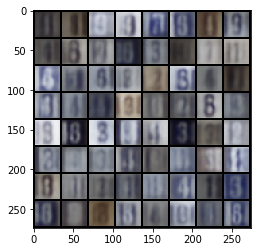

In [5]:
samples = torch.randn(size=(64, 100))
reconstructed_samples = vae.decode(samples)
show(make_grid(reconstructed_samples))

## 3.2 Perturbations in One Dimension

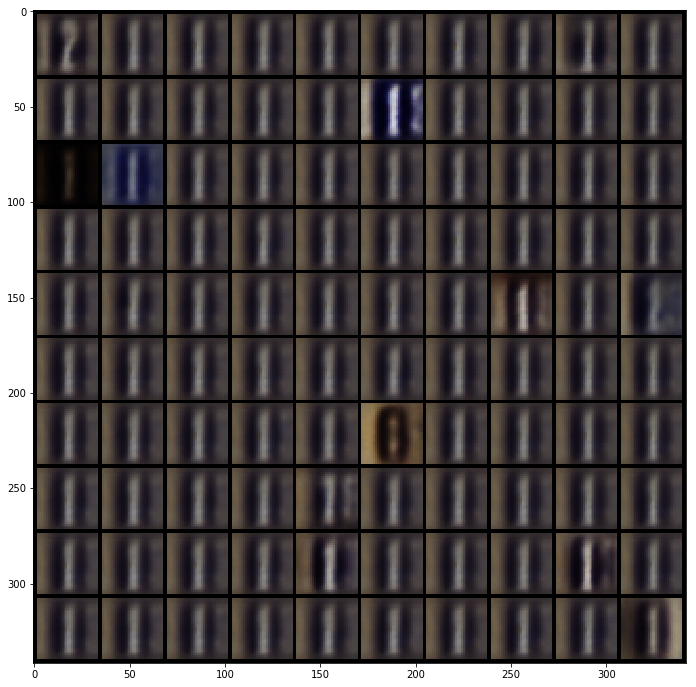

In [6]:
z = torch.randn(size=(1, 100))
reconstructed = vae.decode(z)
reconstructed_images = perturb(z, 4)
grid = make_grid(reconstructed_images, nrow=10)
plt.rcParams['figure.figsize'] = [20, 12]
show(grid)

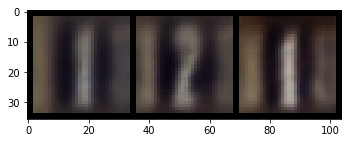

In [7]:
plt.rcParams['figure.figsize'] = [7, 2]
interesting_grid = make_grid(torch.stack([reconstructed[0], reconstructed_images[0], reconstructed_images[47]]))
show(interesting_grid)

## 3.3.(a) Latent Interpolation in z-space

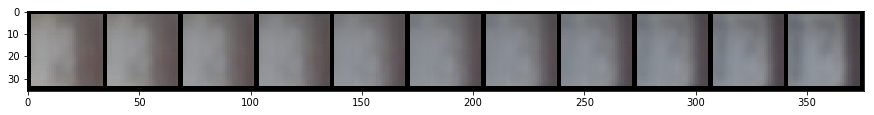

In [8]:
plt.rcParams['figure.figsize'] = [15, 6]
interpolation_1()

## 3.3.(b) Latent Interpolation in X-space

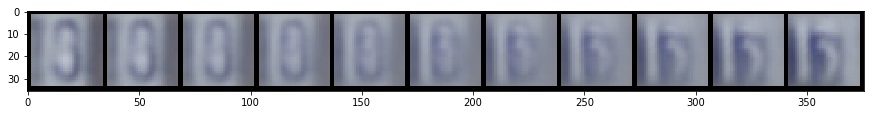

In [9]:
plt.rcParams['figure.figsize'] = [15, 6]
interpolation_2()